# PythonのJupyter Labで学ぶ統計学
  統計学の勉強をしようと参考書を買ってみたのですが、公式やデータを眺めながら、説明を覚えるだけになってしまい面白くなくなってしまいました。
  
  そこで、統計処理や数値計算を得意とするプログラミング言語であるPythonを使用し実際にデータ処理や表出力を行いながら学習を進めようと思いました。  
  

  
  統計処理の方法はこちらのサイトを参考にしています  
  [PythonエンジニアによるPython3学習サイト](https://www.python.ambitious-engineer.com/application#i-4)
  
  基礎的な内容は参考書です  
  [統計学検定2級](https://www.amazon.co.jp/%E6%94%B9%E8%A8%82%E7%89%88-%E6%97%A5%E6%9C%AC%E7%B5%B1%E8%A8%88%E5%AD%A6%E4%BC%9A%E5%85%AC%E5%BC%8F%E8%AA%8D%E5%AE%9A-%E7%B5%B1%E8%A8%88%E6%A4%9C%E5%AE%9A2%E7%B4%9A%E5%AF%BE%E5%BF%9C-%E7%B5%B1%E8%A8%88%E5%AD%A6%E5%9F%BA%E7%A4%8E-%E7%94%B0%E4%B8%AD%E8%B1%8A/dp/4489022271/ref=sr_1_2?keywords=%E7%B5%B1%E8%A8%88%E5%AD%A6%E6%A4%9C%E5%AE%9A2%E7%B4%9A&qid=1655036998&s=books&sprefix=%E7%B5%B1%E8%A8%88%E5%AD%A6%E6%A4%9C%E5%AE%9A%2Cstripbooks%2C214&sr=1-2)
  
### 実行環境
   Docker + JupyterLab
   参考サイト[DockerでJupyterを起動させ機械学習を始める](https://zenn.dev/heshikirihasebe/articles/4b8e5ef3f72049)

## 1. データとライブラリ

>pandas, numpy, matplotlibのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

データは統計入門者おなじみのアイリスデータを使用  
アイリスの花の測定値が入力されたCSVをフォルダに入れておく  
- 1 Sepal Length(cm) がく片の長さ
- 2 Sepal Width がく片の幅
- 3 Petal length 花びらの長さ
- 4 petal Width 花びらの幅
- 5 species 種類

>pandasで読み込んだCSVを表として出力

In [2]:
df = pd.read_csv('iris-dataset.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


>カラムの抽出

In [3]:
# sepal_lengthのカラムを配列に抜き出す
data = np.array(df["sepal_length"])

# pandasで表のヘッダを作成
data_table = pd.DataFrame(columns=["sepal_length"])
for idx, val in enumerate(data):
  # 抽出した各カラム値をテーブルに入れていく
    data_table.loc[idx] = [val]
data_table

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


>最大値・最小値・平均値

In [4]:
print(np.mean(data)) # 平均値
print(np.max(data)) # 最大値
print(np.min(data)) # 最小値

5.843333333333334
7.9
4.3


## 2. ヒストグラム
### ・階級
### ・度数(各階級に属するデータ数）

In [5]:
# np.histogram()オプションの指定に従いヒストグラムを作成
hist, bin_edges = np.histogram(data, bins=10,range=None, density=None)

# 各階級の境目の数値(端点)
print(bin_edges)
# 各階級に属するデータ数
print(hist)

[4.3  4.66 5.02 5.38 5.74 6.1  6.46 6.82 7.18 7.54 7.9 ]
[ 9 23 14 27 16 26 18  6  5  6]


### numpy.histgram関数について  
np.histogram(a, bins=10, range=None, density=None)  
- a:対象となるデータ配列
- bins：階級数(int)の調節 or 階級範囲指定(list))
- range:抽出するデータ値の範囲
- density：Trueの場合、データの総数が1となるようY軸が調整される

>ヒストグラムを表として出力

In [6]:
# 表示用に整形する
# pandasで表のヘッダを作成
hist_df = pd.DataFrame(columns=["start","end","count"])

for idx, val in enumerate(hist):
  # 各階級の範囲(start-end)と度数をテーブルにする
    start = round(bin_edges[idx], 2)
    end = round(bin_edges[idx + 1], 2)
    hist_df.loc[idx] = [start, end, val]
    
hist_df

,start,end,count
0,4.30,4.66,9.0
1,4.66,5.02,23.0
2,5.02,5.38,14.0
3,5.38,5.74,27.0
4,5.74,6.10,16.0
5,6.10,6.46,26.0
6,6.46,6.82,18.0
7,6.82,7.18,6.0
8,7.18,7.54,5.0
9,7.54,7.90,6.0


>ヒストグラムをグラフとして出力

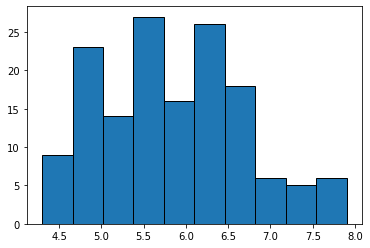

In [7]:
# グラフ描画はmatplotlibを使用
fig = plt.figure()

# 描画領域の設定
ax = fig.add_subplot(1, 1, 1) # 1(x): 1(y)  描画領域中の1番目に表示指定

ax.hist(data, bins=10,  histtype='bar', ec='black')
plt.show()

### matplotlib.pyplot.hist関数について
#### histtype
  - bar:通常
  - barstacked:積み上げグラフ
  - step:(線)
  - stepfilled:塗りつぶしあり  


#### density

- true:縦軸(データ数)の合計値を1に自動調節

### 例として様々な設定値のグラフ

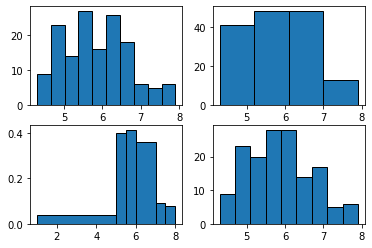

In [8]:
fig = plt.figure()

# 1/2 ×　1/2　の大きさのグラフを全体の各領域に並べる
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 色々あるヒストグラムの作成オプション
ax1.hist(data, bins=10,  histtype='bar', ec='black')
ax2.hist(data, bins=4,  histtype='bar', ec='black')
ax3.hist(data, bins=[1, 5, 5.5, 6.0, 7, 7.5, 8],  histtype='bar', density="true", ec='black')
ax4.hist(data, bins="auto", histtype='bar', ec='black')
plt.show()

### 階級数の決定方法  
> スタージェスの公式  
>K=1+log2n  
 
> フリードマン＝ダイアコニスの公式  
>k=2×Xの4文意範囲×2^(-1/3)  

　　よくわからん

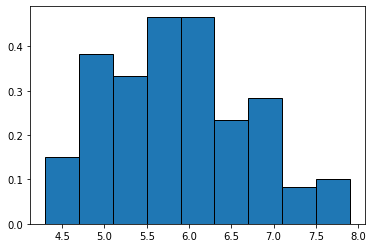

階級値を自動算出


In [9]:
# binsのauto指定でスタージェス、フリードマン＝ダイアコニスの公式のいずれかで最適な分割数が決定する
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data, bins="auto", density=True, histtype='barstacked', ec='black')
plt.show()
print("階級値を自動算出")

## 3. 統計量とデータの中心　　
- 統計量:観測したデータそのものではなくそれらのデータの特徴を代表的に表す値
- 基本統計量:平均，中央値，分散，標準偏差など

### データの中心を表す平均値・中央値・最頻値

In [10]:
import numpy as np

from scipy import stats
# 例として配列をセット
data = np.array([1,2,2,3,3,5,5,5,7,7,10])

# 中央値
print(np.median(data)) # 3.0

# 平均値
print(np.mean(data)) # 4.4

# 最頻値
m = stats.mode(data)
print(m.mode[0]) # 最頻値
print(m.count[0]) # 最頻値のデータ数

5.0
4.545454545454546
5
3


### 平均が中心とは限らない

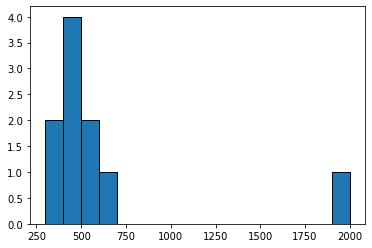

平均値：603.0
中央値：432.5


In [11]:
data = np.array([350, 355, 410, 420, 430, 435, 500, 550, 600, 1980])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data, bins=range(300, 2100, 100),histtype='barstacked', ec='black')
plt.show()
print("平均値：" + str(np.mean(data)))
print("中央値：" + str(np.median(data)))

>分布が左右対称でない、外れ値がある、下限があり上限がない、といったデータの場合は平均と中央値が異なる  

>ロバスト性：中央値のような外れ値に対する安定性